# **Hands-on Assignment 8: Cumulative Review**

##**Introduction**
By now, you have extensively used the data from the Digitalis Investigation Group (DIG) Trial for learning data cleaning, data manipulation, data visualization, and biostatistics. With the introductions of the above staistical methods, you are ready to publish a complete mock analysis.


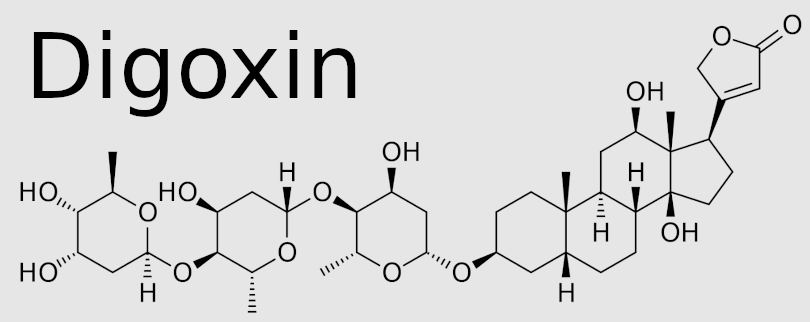

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous assignments to complete a mock analysis of the DIG data. You must start with the uncleaned dataset and perform data cleaning, data visualization, basic biostatistical anlysis, and then publish it on GitHub. You will be graded based whether all four components are present and published in an organized, documented fashion on GitHub that approximately follows this structure below.

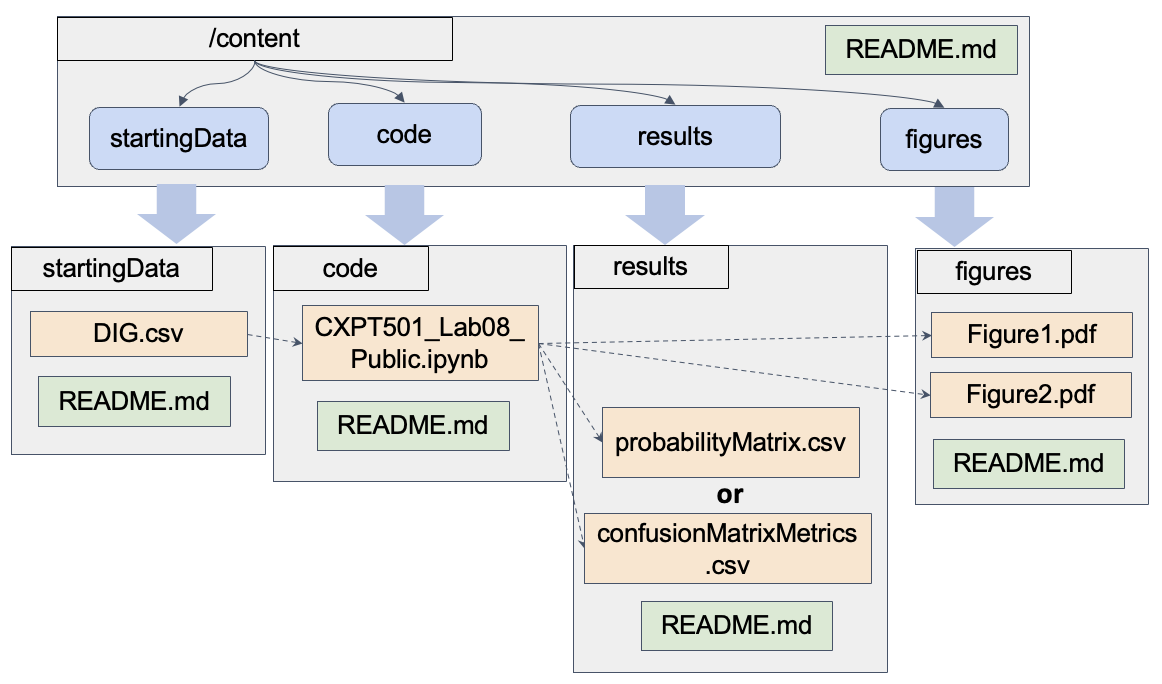

This will be similar to your Final Project in which you will analyze your own dataset with biostatistical methods that will be introduced later in the course.

Thirdly, you **must** include a link to your **public** GitHub repository here:


<font color='red'>Add the link to your GitHub repo here.</font>

##**Steps**

Write the code for your analysis here. You must add comments with text boxes to improve your code's readability.

###**Data Cleaning & Manipulation**

In [ ]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')
df.head()


,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0


In [ ]:
# investigation of Approximate duration of Congestive Heart Failure (CHFDUR) vs Number of Hospitalization (NOSP)

df.dropna(how = "any")
dff = df[["AGE","RACE","CHFDUR","NHOSP"]]

# remove outlier in CHFDUR based on iqr
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

dfff = remove_outlier(dff, "CHFDUR")
dfh = remove_outlier(dfff, "NHOSP")
dfc = dfh.reset_index(drop=True)

#save

In [ ]:
dfc

,AGE,RACE,CHFDUR,NHOSP
0,77,1,2.0,4
1,72,1,12.0,2
2,69,2,84.0,5
3,64,1,31.0,0
4,60,2,6.0,0
...,...,...,...,...
5414,64,1,48.0,1
5415,62,1,2.0,2
5416,39,1,3.0,0
5417,56,1,11.0,6


###**Data Visualization**

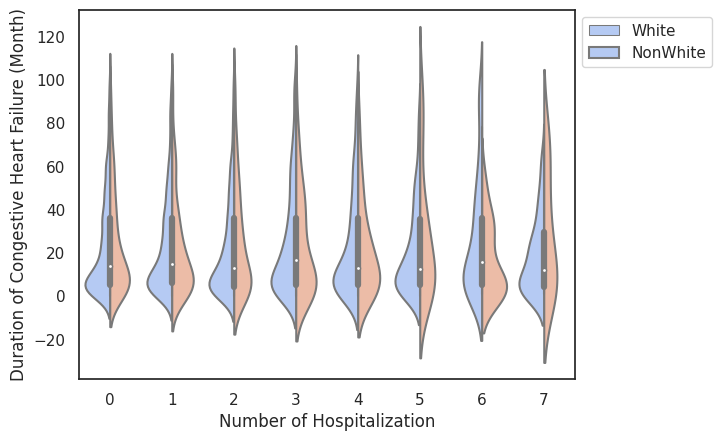

<Figure size 640x480 with 0 Axes>

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.set(style="white")
ax = sns.violinplot(dfc, x="NHOSP", y="CHFDUR", hue="RACE", split=True, palette='coolwarm')
ax.set(xlabel='Number of Hospitalization', ylabel='Duration of Congestive Heart Failure (Month)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels = ['White', 'NonWhite'])
plt.show()
plt.savefig("/content/figure/violinplot.pdf", format="pdf", bbox_inches="tight")

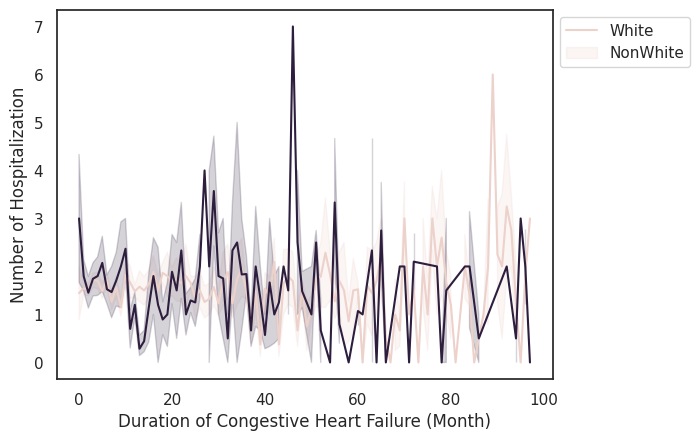

<Figure size 640x480 with 0 Axes>

In [145]:
ax = sns.set(style="white", palette="coolwarm")
ax = sns.lineplot(data=dfc, x="CHFDUR", y="NHOSP", hue="RACE", estimator='mean', errorbar=('ci', 80))
ax.set(ylabel='Number of Hospitalization', xlabel='Duration of Congestive Heart Failure (Month)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels = ['White', 'NonWhite'])
plt.show()
plt.savefig("/content/figure/lineplot.pdf", format="pdf", bbox_inches="tight")


###**Statistical Analysis**

In [ ]:
# Standard Independent T-test
# H0: CHFDUR of NHOSP >= 4 is equal to CHFDUR of NHOSP<4
# H1:

n5 = dfc[dfc["NHOSP"]>=4]
nn5 = n5["CHFDUR"]
nnn5 = nn5.reset_index(drop=True)

n4 = dfc[dfc["NHOSP"]<4]
nn4 = n4["CHFDUR"]
nnn4 = nn4.reset_index(drop=True)

import scipy.stats as stats
stats.ttest_ind(nnn4, nnn5, alternative = 'two-sided', equal_var=False)

# Fail to reject H0

TtestResult(statistic=0.43943131782389705, pvalue=0.6603665666963086, df=5417.0)

###**Publication on GitHub**

In [129]:
%%bash
rm -r sample_data

In [130]:
%%bash
mkdir startingData code result figure

In [ ]:
%%bash
cd startingData
wget "https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP"

In [147]:
%%bash
cd startingData
cat > readme.md
This is the starting data

In [148]:
%%bash
cd figure
cat > readme.md
This is the two figures requested

In [149]:
%%bash
cd result
cat > readme.md
This is the statistical analysis but not yet exist

In [150]:
%%bash
cd code
cat > readme.md
This is the code

In [151]:
%%bash
cat > .gitignore
.*
.gitignore
git config --global user.email "xiesheng@usc.edu"
git config --global user.name "xiesheng"
git init
git commit -m "First commit"

In [152]:
%%bash
ssh-keygen -t ed25519 -C 'xiesheng@usc.edu' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519
cat ~/.ssh/id_ed25519
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519
cat ~/.ssh/id_ed25519.pub
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:3HuHcQmlrE2yW9/+28W1KDcHw/+xqIW7E+bJfKnBZqI xiesheng@usc.edu
The key's randomart image is:
+--[ED25519 256]--+
|              .  |
|           . o   |
|          . =    |
|       . . *.. . |
|        S + ++o .|
|          .*.==oo|
|         .BB==+=+|
|        . +B*++.*|
|       E   =*. oB|
+----[SHA256]-----+


Created directory '/root/.ssh'.


In [ ]:
%%bash
git remote add origin git@github.com:Pinegraphite123/Assignment8.git
git branch -M main
git push -u origin main

To obtain the `CXPT501_Lab08_Public.ipynb` file, select `File -> Download -> Download .ipynb`.

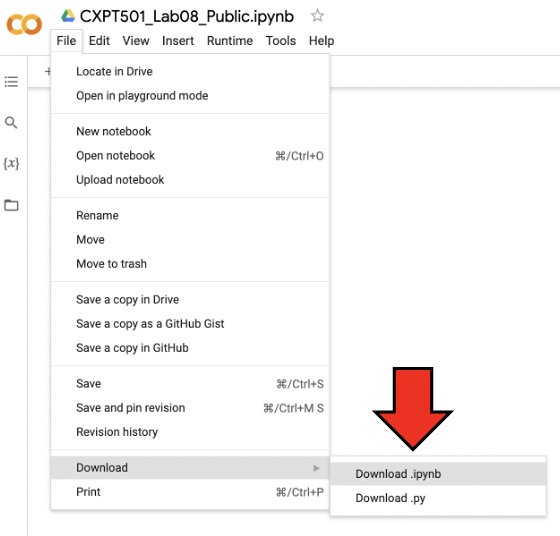

Then, you can manually upload this file to your notebook by clicking on the `Upload to session storage` button boxed in red.

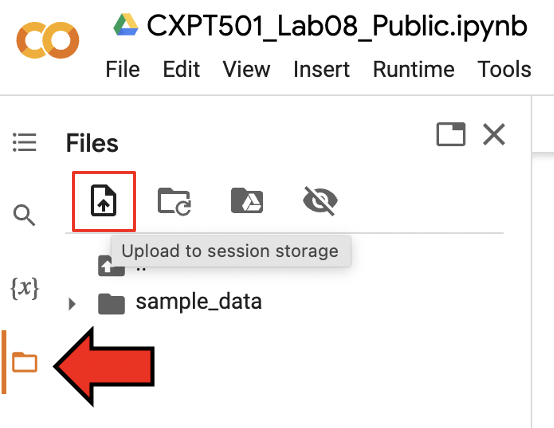

##**Rubric (10 points)**

**1 points**

The copy of this notebook contains some comments annotating the steps of the analysis performed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

The original DIG Data was imported as a Pandas DataFrame, NaN values were cleaned in some manner, and some outliers were removed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

At least two publication ready plots were made that demonstrate usage of both customization via addition arguments and via Matplotlib Axes.

<font color='blue'>Grader comments: None</font>

---
**2 points**

One of the following biostatistical analyses were peformed:
*   Calculation of Joint, Marginal, and Conditional Probabilities in which the Probability matrix is exported as a .csv file.
*   Calculation of Sensitivity and Specificity in which a table of confusion matrix metrics was exported as a .csv file.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The entire analysis was uploaded to GitHub with a structure akin to the diagram in the Instructions section.

<font color='blue'>Grader comments: None</font>

---
**1 point**

There is a README file in every directory describing all files and subdirectories with at least a short description.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The public GitHub repository contains the notebook's analysis exported as an .ipynb file.

<font color='blue'>Grader comments: None</font>